In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


dropping unwanted columns


In [18]:
df.drop(columns=['Unnamed: 0','year','month'],axis=0,inplace=True)

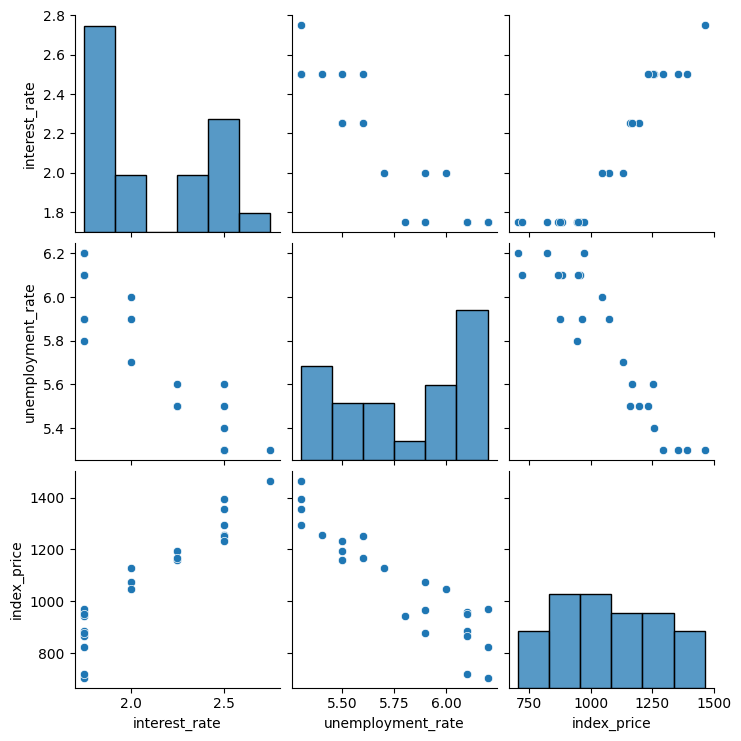

In [19]:
sns.pairplot(df)

In [20]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


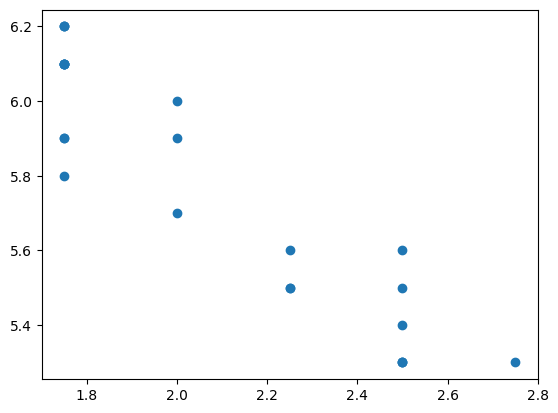

In [21]:
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.show()

we can see that both are like inversly propositional

# Categorizing the data

In [22]:
X = df[['interest_rate','unemployment_rate']]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y = df['index_price']
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

# **data splitting**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

**Standardization**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

<Axes: xlabel='interest_rate', ylabel='index_price'>

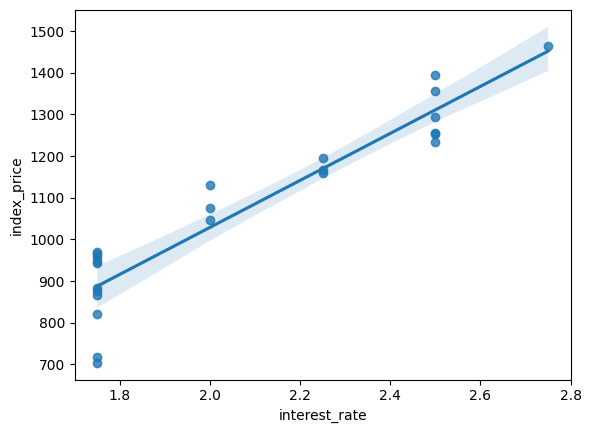

In [27]:
# import seaborn as sns
# sns.regplot(df['interest_rate'],df['index_price'])
import seaborn as sns

sns.regplot(x=df['interest_rate'], y=df['index_price'])


Says if the index price increases then the index rate also increases!

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

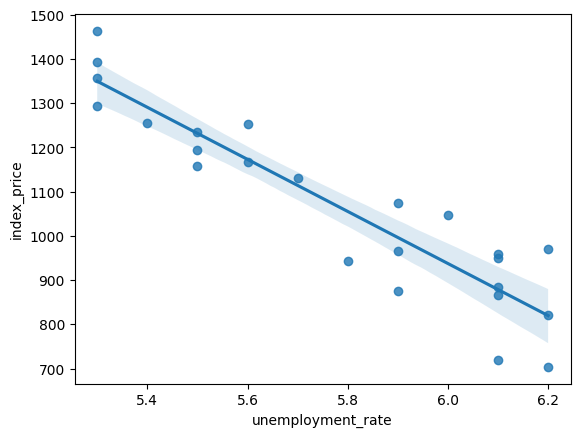

In [28]:
import seaborn as sns

sns.regplot(x=df['unemployment_rate'], y=df['index_price'])

Says if the more unemployment rate then less index rate!

# **Model creation**

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print(model.coef_)
print(model.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [31]:
y_pred = model.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [32]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

from both the Y-pred and y-test, we can see that almost 75 is varying. not a bad model

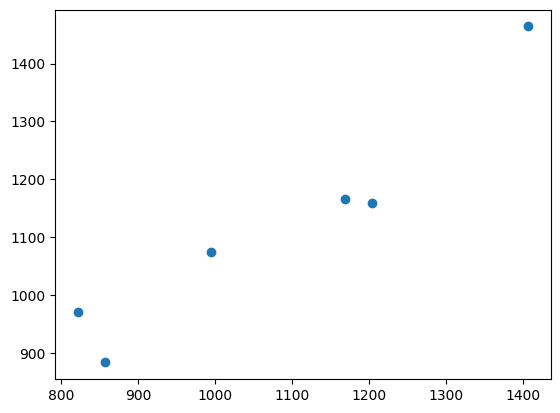

In [33]:
plt.scatter(y_pred,y_test)

this shows that the model is predicting some linearly

# **Metrics**

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('MAE: ',mae)
print('MSE :',mse)
print('RMSE :',rmse)

MAE:  59.935781523235484
MSE : 5793.762887712569
RMSE : 76.11677139574805


# **Assumptions--from this we can check whether our model preformed well or not**

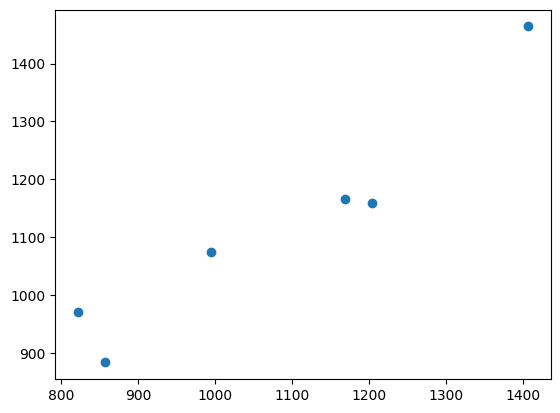

In [35]:
plt.scatter(y_pred,y_test)

this is a kind like uniform distributed or we can say like it does not form any pattern like. then we can say it is good model

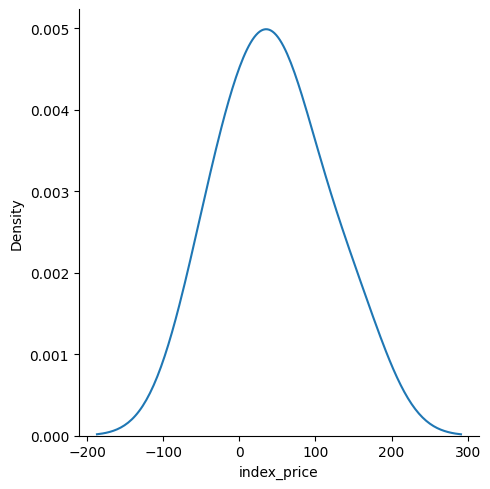

In [36]:
import seaborn as sns
residuals = y_test-y_pred
sns.displot(residuals, kind='kde')

normal distributions says our model is good